# Aprendizaje no supervisado - Mascotas

Carga de librerias

In [404]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; 
sns.set_theme()  # for plot styling
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


In [405]:
df = pd.read_csv("datasets/pet_train.csv", header=0)
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [407]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [408]:
df.isnull().sum()

Type                0
Name             1265
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        13
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

## K-Means

### 1. Preparar los datos

In [409]:
#Cambiar los valores nulos por un string cuyo valor sea  ""
df[['Name', 'Description']] = df[['Name', 'Description']].fillna("null")

# Verificar que los cambios se aplicaron
print(df[['Name', 'Description']].isnull().sum())
# Seleccionar columnas para clustering (excluir identificadores como PetID y RescuerID)
columns_to_use = ["Type", "Age", "Breed1", "Breed2", "Gender", "MaturitySize", "FurLength",
                  "Vaccinated", "Dewormed", "Sterilized", "Health", "Fee", "PhotoAmt", "VideoAmt"]

df_clustering = df[columns_to_use]
# Convertir variables categóricas a numéricas
label_enc = LabelEncoder()
for col in ["Type", "Gender", "MaturitySize", "FurLength", "Vaccinated", "Dewormed", "Sterilized", "Health"]:
    df_clustering[col] = label_enc.fit_transform(df_clustering[col])

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

Name           0
Description    0
dtype: int64


### 2. Elegir el número óptimo de clusters (K)

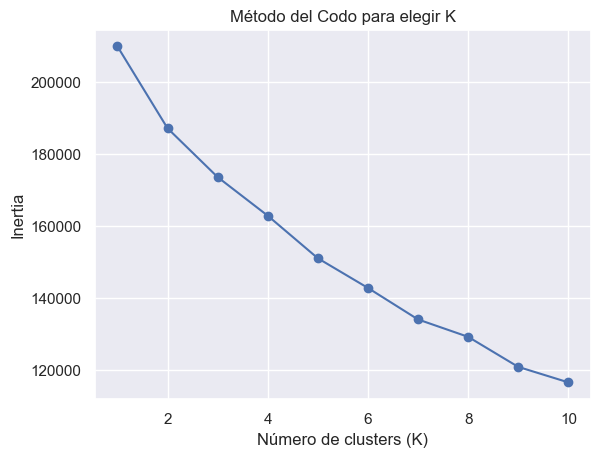

In [410]:
# Probar diferentes valores de K (de 2 a 10)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=16, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inertia")
plt.title("Método del Codo para elegir K")
plt.show()

In [411]:
# Aplicar K-Means con el mejor número de clusters
cluster_number = 3
kmeans = KMeans(n_clusters=cluster_number, random_state=16, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Revisar la cantidad de elementos en cada cluster
print(df["Cluster"].value_counts())

Cluster
0    6741
1    6383
2    1869
Name: count, dtype: int64


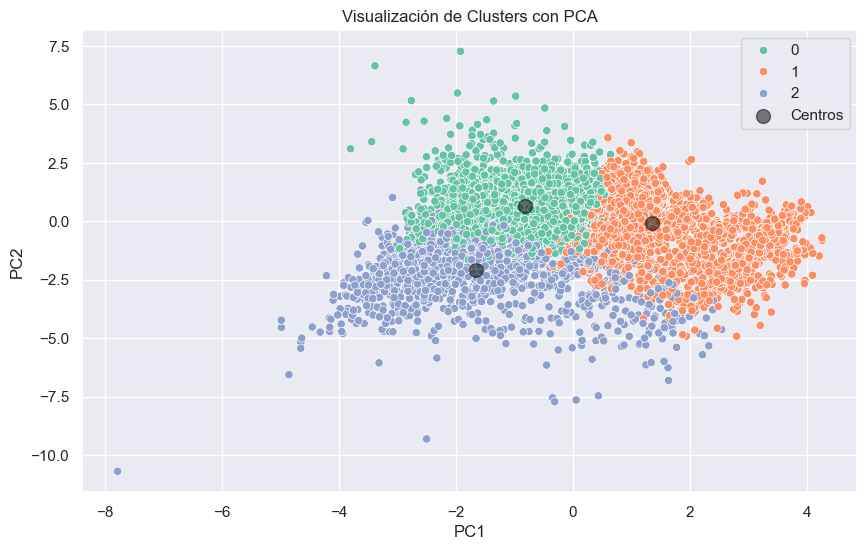

In [412]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Reducir dimensiones a 2 componentes principales
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Crear un DataFrame con los clusters y las componentes principales
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = df["Cluster"]

# Ajustar el modelo KMeans para obtener los centros
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Obtener los centros de los clusters en el espacio PCA
centers = pca.transform(kmeans.cluster_centers_)

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca, palette="Set2")
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='black', marker='o', label='Centros', alpha=0.5)
plt.title("Visualización de Clusters con PCA")
plt.legend()
plt.show()



In [413]:
kmeans.fit(df_pca)

# Predecir las etiquetas (clusters) de cada punto
labels = kmeans.labels_

# Calcular el Silhouette Score
score = silhouette_score(df_pca, labels)

print(f"Silhouette Score: {score}")

Silhouette Score: 0.4556119356565703
